In [1]:
# 데이터 분석 및 시각화에 필요한 라이브러리들을 가져옵니다.
# pathlib: 파일 경로를 쉽게 다루기 위한 라이브러리
from pathlib import Path
# display: Jupyter Notebook에서 데이터프레임 등을 예쁘게 출력하기 위해 사용
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import seaborn as sns

######## 한글 폰트 사용을 위한 설정 ########

font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정
########################################## 

# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 시각화에서 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
# 시스템에 폰트가 설치되어 있지 않으면 오류가 발생할 수 있어 try-except 구문으로 감쌌습니다.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)


In [2]:
# 데이터셋 병합
DATA_PATH1 = Path('../data/2022Data_part1.csv')
DATA_PATH2 = Path('../data/2022Data_part2.csv')
df_part1 = pd.read_csv(DATA_PATH1)
df_part2 = pd.read_csv(DATA_PATH2)

# DeepSurv 분석용 샘플 데이터를 불러오고 기본 전처리를 수행합니다.
risk_df = pd.concat([df_part1, df_part2], ignore_index=True).rename(columns=lambda col: col.strip())

C:\Users\roxie\AppData\Local\Temp\ipykernel_19148\2981146714.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part1 = pd.read_csv(DATA_PATH1)


In [3]:
# CSV 첫 번째 열이 인덱스일 경우 제거합니다.
if '' in risk_df.columns:
    risk_df = risk_df.drop(columns=[''])

# 기존 노트북과 컬럼 이름을 맞춰 분석을 단순화합니다.
risk_df = risk_df.rename(columns={'Vital status recode (study cutoff used)': 'Vital status recode'})
risk_df['Survival months'] = pd.to_numeric(risk_df['Survival months'], errors='coerce')

category_labels = {
    1: '1 - Primary cancer death',
    2: '2 - Cancer-related complication',
    3: '3 - Non-cancer death',
}
category_order = [1, 2, 3]

def infer_category(row):
    status = row.get('Vital status recode')
    cod = row.get('COD to site recode')
    site = row.get('Site recode ICD-O-3/WHO 2008')

    if pd.isna(status):
        return pd.NA
    if status == 'Alive':
        return pd.NA
    if status == 'Dead':
        if cod == 'Other Cause of Death':
            return 3
        if cod == site:
            return 1
        if pd.isna(cod):
            return 2
        return 2
    return pd.NA

risk_df['category'] = risk_df.apply(infer_category, axis=1).astype('Int64')
risk_df['category_label'] = risk_df['category'].map(category_labels)
risk_df['category_label'] = risk_df['category_label'].fillna('Unclassified (Alive or censored)')
risk_df['event'] = risk_df['category'].isin(category_order)

display(risk_df.head())



,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode,category,category_label,event
0,671,65-69 years,Male,2018,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",3,...,Blank(s),Blank(s),450,Not PRCDA,Complete dates are available and there are mor...,59.0,Alive,<NA>,Unclassified (Alive or censored),False
1,812,65-69 years,Female,2022,2022,White,Stomach,163,C16.3-Gastric antrum,L,...,Blank(s),Blank(s),100,Not PRCDA,Complete dates are available and there are mor...,7.0,Alive,<NA>,Unclassified (Alive or censored),False
2,878,60-64 years,Male,2004,2022,White,Appendix,181,C18.1-Appendix,Blank(s),...,Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,218.0,Alive,<NA>,Unclassified (Alive or censored),False
3,1018,70-74 years,Female,2011,2022,White,Ascending Colon,182,C18.2-Ascending colon,Blank(s),...,Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,134.0,Alive,<NA>,Unclassified (Alive or censored),False
4,1269,40-44 years,Female,2007,2022,White,Sigmoid Colon,187,C18.7-Sigmoid colon,Blank(s),...,Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,187.0,Alive,<NA>,Unclassified (Alive or censored),False


In [4]:
####### COD to site recode를 기반으로 새 그룹 변수 생성 #######
# COD to site recode 열의 값을 기반으로 새로운 그룹 변수를 생성하는 함수입니다

def classify_cod_group(cod_label):
    cancer_terms = ['Cancer', 'Head & Neck', 'Digestive', 'Respiratory', 'Breast', 'Genital', 'Urinary', 'Hematopoietic']
    comp_terms = ['Sepsis', 'Pneumonia', 'Infection', 'Diabetes', 'Liver', 'Renal', 'COPD', 'Hypertension', 'Alzheimer']
    external_terms = ['Accident', 'Homicide', 'Unknown', 'Undetermined']
    suicide_terms = ['Suicide', 'Self-harm']

    if any(t in cod_label for t in cancer_terms):
        return 'Cancer'
    elif any(t in cod_label for t in comp_terms):
        return 'Complications'
    elif any(t in cod_label for t in suicide_terms):
        return 'Suicide'
    elif any(t in cod_label for t in external_terms):
        return 'External'
    else:
        return 'Other'

risk_df["COD_Group"] = risk_df["COD to site recode"].apply(classify_cod_group)


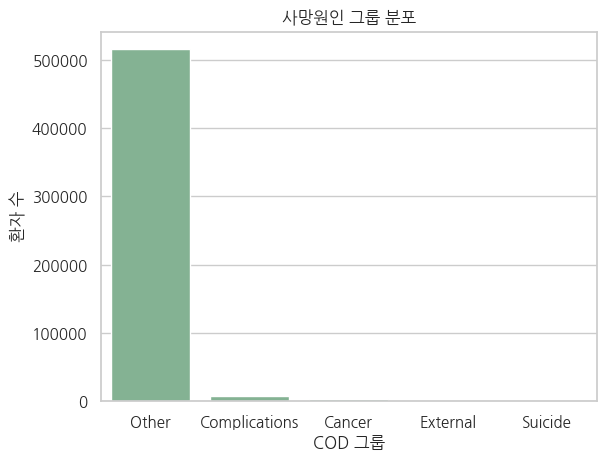

In [5]:
# 암 직접사망이 전체의 몇 %인지, Complications 사망이 차지하는 비율을 파악.

sns.countplot(data=risk_df, x="COD_Group", order=risk_df["COD_Group"].value_counts().index)
plt.title("사망원인 그룹 분포")
plt.xlabel("COD 그룹")
plt.ylabel("환자 수")
plt.show()


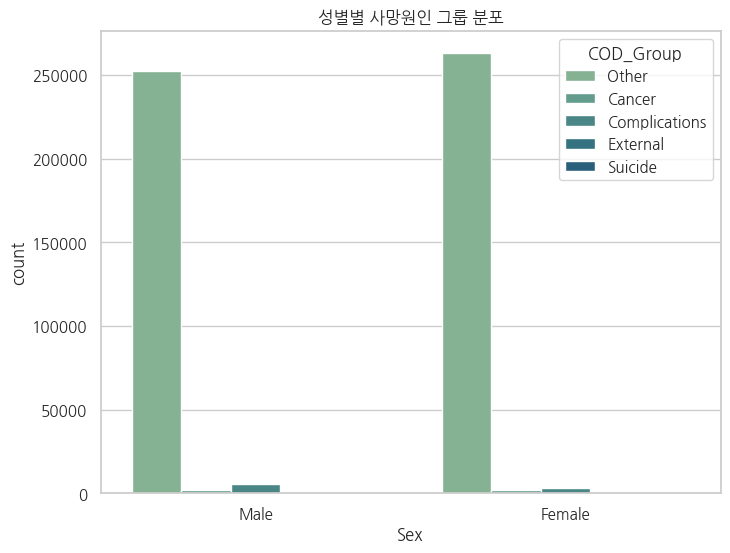

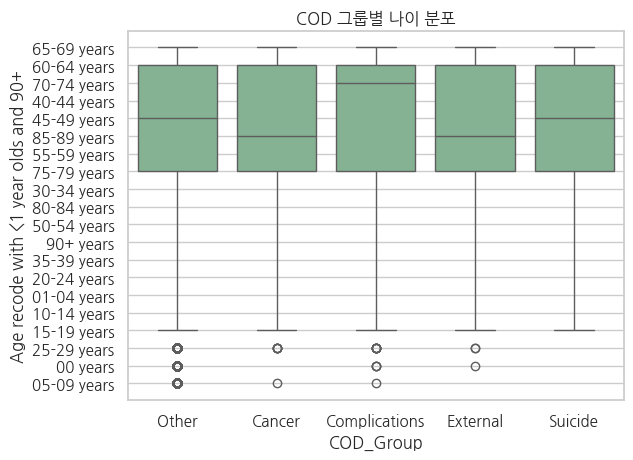

In [6]:
# 연령·성별별 COD 그룹 분포
# => Complications 사망은 고령층·남성에 집중되는지 확인 가능.

plt.figure(figsize=(8,6))
sns.countplot(data=risk_df, x="Sex", hue="COD_Group")
plt.title("성별별 사망원인 그룹 분포")
plt.show()

sns.boxplot(data=risk_df, x="COD_Group", y="Age recode with <1 year olds and 90+")
plt.title("COD 그룹별 나이 분포")
plt.show()

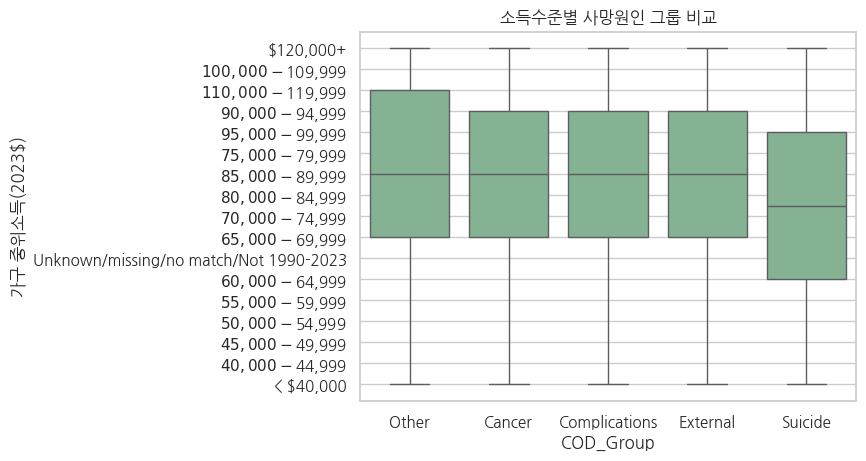

In [7]:
sns.boxplot(data=risk_df, x="COD_Group", y="Median household income inflation adj to 2023")
plt.title("소득수준별 사망원인 그룹 비교")
plt.ylabel("가구 중위소득(2023$)")
plt.show()


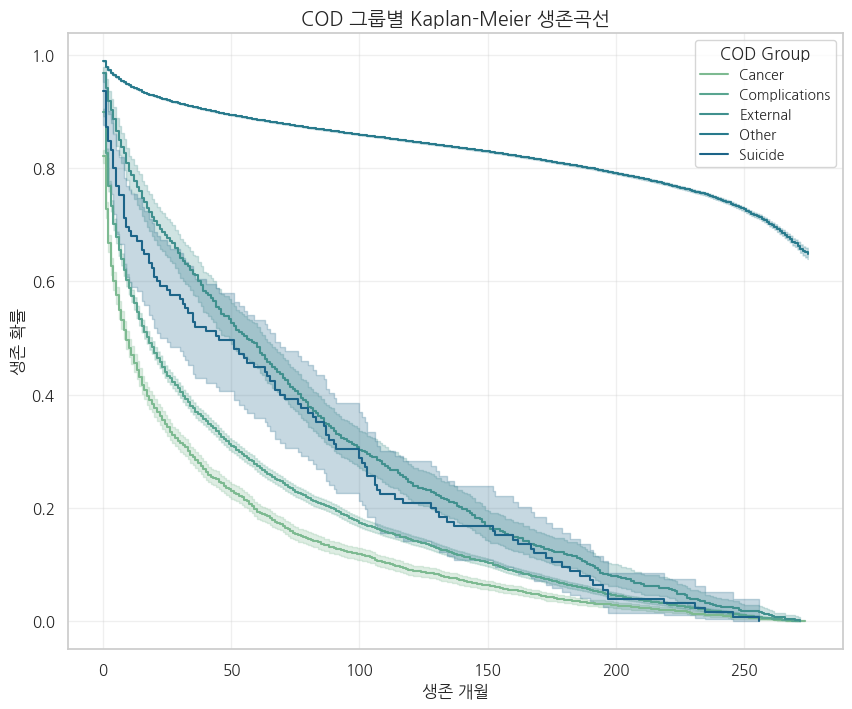

각 COD 그룹별 분석 대상 환자 수:
COD_Group
Cancer             3840
Complications      7891
External            740
Other            513706
Suicide             125
dtype: int64


In [8]:
from lifelines import KaplanMeierFitter

# 생존 분석에 필요한 데이터만 필터링 (결측값 제거)
survival_data = risk_df.dropna(subset=["Survival months", "Vital status recode", "COD_Group"])

plt.figure(figsize=(10,8))
for g, subset in survival_data.groupby("COD_Group"):
    kmf = KaplanMeierFitter()
    # 사망을 이벤트로 설정 (True), 생존을 검열로 설정 (False)
    event_observed = subset["Vital status recode"] == "Dead"
    kmf.fit(subset["Survival months"], event_observed=event_observed, label=g)
    kmf.plot_survival_function()

plt.title("COD 그룹별 Kaplan-Meier 생존곡선", fontsize=14)
plt.xlabel("생존 개월", fontsize=12)
plt.ylabel("생존 확률", fontsize=12)
plt.legend(title="COD Group", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# 각 그룹별 데이터 개수 확인
print("각 COD 그룹별 분석 대상 환자 수:")
print(survival_data.groupby("COD_Group").size())

합병증 사망의 심각성: Complications 그룹이 Cancer 그룹보다도 더 나쁜 예후를 보여, 암 치료 과정에서 발생하는 합병증 관리의 중요성을 시사

예후 순서: Other > External > Suicide > Cancer > Complications

조기 사망 위험: Complications와 Cancer 그룹은 초기 6개월 내에 급격한 생존율 감소를 보임

장기 생존: Other 그룹만이 장기간에 걸쳐 안정적인 생존율을 유지